In [29]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [30]:
import numpy as np
import pandas as pd

In [31]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [32]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [33]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [34]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect= True)

In [35]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [36]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [37]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [38]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
final_data_point = session.query(measurement.date).order_by(measurement.date.desc()).first()

last_12_months = dt.date(2017, 8,23) - dt.timedelta(days= 365)

# Perform a query to retrieve the date and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > last_12_months).\
    order_by(measurement.date).all()

In [39]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df= pd.DataFrame(precipitation)

prcp_df.rename(columns = {0: 'date', 1: 'precipitation'}, inplace= True)

In [40]:
prcp_df.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


In [41]:
# Sort the dataframe by date
prcp_df.sort_values(by=['date'])

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2221,2017-08-23,0.08
2219,2017-08-23,0.00
2220,2017-08-23,0.00


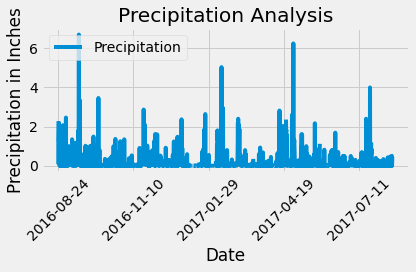

In [42]:
# Use Pandas Plotting with Matplotlib to plot the data
# whatever = datetime object where you did the timedelta of days=365
#session.query(Measurement.date, Measurement.prcp)
#.filter(Measurement.date >= whatever)

prcp_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Precipitation in Inches")
plt.title("Precipitation Analysis")
plt.legend(["Precipitation"])
plt.xticks(rotation= 45)
plt.tight_layout()
plt.savefig("Images/Precipitation Analysis.png")
plt.show()


In [43]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# df.describe()
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [44]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(measurement).group_by(measurement.station).count()
print ('There are {} stations available.'.format(stations))

There are 9 stations available.


In [45]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# If you in your session.query(Measurement.station, func.count(Measurement.station))
# .group_by on Measurement.station and also .order_by(func.count(Measurement.station) and sort in desc order
active = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

print(f"Most Active Stations")

active

Most Active Stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [46]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
#.filter on Measurment.station using the station id that appeared at the top of the previous answer
# the session.query(func.min(Measurement.tobs), func.max(Measurment.tobs), func.avg(Measurment.tobs))
station_temps = active[0][0]

station_temps = session.query(func.min( measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == station_temps).all()

print(f"Most Active Station Temperatures")
print(f"Low: {station_temps[0][0]} High: {station_temps[0][1]} Average: {round(station_temps[0][2], 1)}")


Most Active Station Temperatures
Low: 54.0 High: 85.0 Average: 71.7


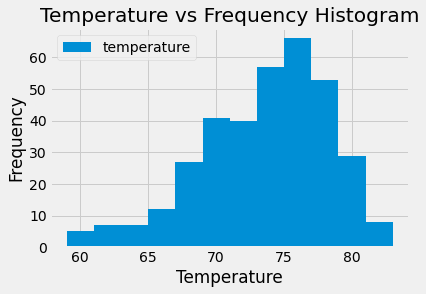

In [47]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_tempature_observations = session.query(measurement.station, func.count(measurement.tobs)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).first()
most_tempature_observations = most_tempature_observations[0]

tempature_observations = session.query(measurement.tobs).filter(measurement.date >= last_12_months).filter(measurement.station == most_tempature_observations).all()
tempature_observations = pd.DataFrame(tempature_observations, columns=['temperature'])

tempature_observations.plot.hist(bins=12, title="Temperature vs Frequency Histogram")
plt.tight_layout()
plt.xlabel("Temperature")
plt.savefig("Images/Temp vs Frequency Histogram.png")
plt.show()



## Bonus Challenge Assignment

In [48]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'Measurement' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
